<a href="https://colab.research.google.com/github/SayantanmPaul/nospam-web/blob/main/backend/spamcommentdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import joblib

In [ ]:
dataset = pd.read_csv('comments.csv',  dtype=str)

In [ ]:
X = dataset['Comment']
y = dataset['CLASS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1).dropna()
X_test = test_data['Comment']
y_test = test_data['CLASS']

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [ ]:
pipeline = make_pipeline(
    CountVectorizer(),
    MultinomialNB()
)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
acc = pipeline.score(X_test, y_test)
accuracy = float(acc)
print("Accuricy of the model: ",acc)
print(f"{accuracy * 100}%")

Accuricy of the model:  0.8822940980326776
88.22940980326776%


In [ ]:
joblib.dump(pipeline, 'model.pkl')

['model.pkl']

In [ ]:
joblib.dump(pipeline.named_steps['countvectorizer'], 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)


LabelEncoder()

In [ ]:
joblib.dump(label_encoder.classes_, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [ ]:
pipeline=joblib.load('model.pkl')
label_encoder=LabelEncoder()
label_encoder.classes_=joblib.load('label_encoder.pkl')

In [ ]:
vectorizer=joblib.load('vectorizer.pkl')
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]
X_test_transformed=vectorizer.transform(X_test)

In [ ]:
X_test_transformed_dense = X_test_transformed.toarray()

In [ ]:
X_test_transformed_strings = [str(x) for x in X_test_transformed_dense]

In [ ]:
proba = pipeline.predict_proba(X_test_transformed_strings)
proba_positive = proba[:, 1] 

In [ ]:
y_test_binary=label_encoder.transform(y_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_binary, proba_positive)
roc_auc = auc(fpr, tpr)

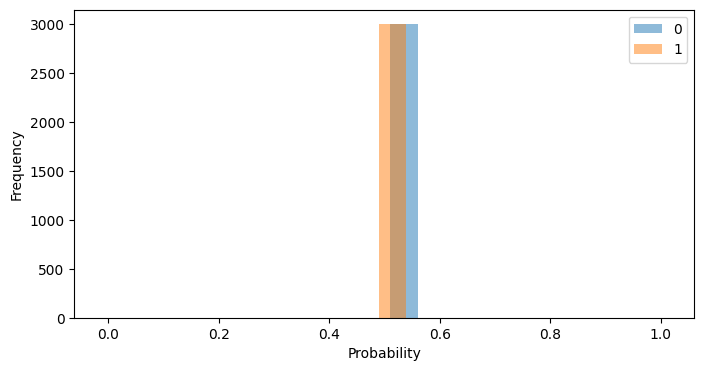

In [ ]:
plt.figure(figsize=(8, 4))
for i,class_label in enumerate(label_encoder.classes_):
  plt.hist(proba[:,i],bins=20, alpha=0.5, label=class_label)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Text(0, 0.5, 'True Positive Rate')

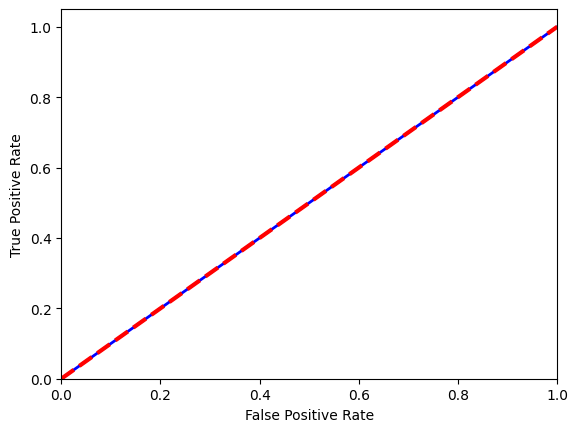

In [ ]:
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='r', linestyle='--', lw=3, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
